# **Task 3: Customer Segmentation**



# Importing libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

# Analyzing dataset

In [22]:
customer_data = pd.read_csv("/content/Mall_Customers.csv")

In [23]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [25]:
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [26]:
X = customer_data.iloc[:,[3,4]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


# Using Within-Cluster Sum of Squares (WCSS)
WCSS is the sum of the variance between the observations in each cluster. It measures the distance between each observation and the centroid and calculates the squared difference between the two.
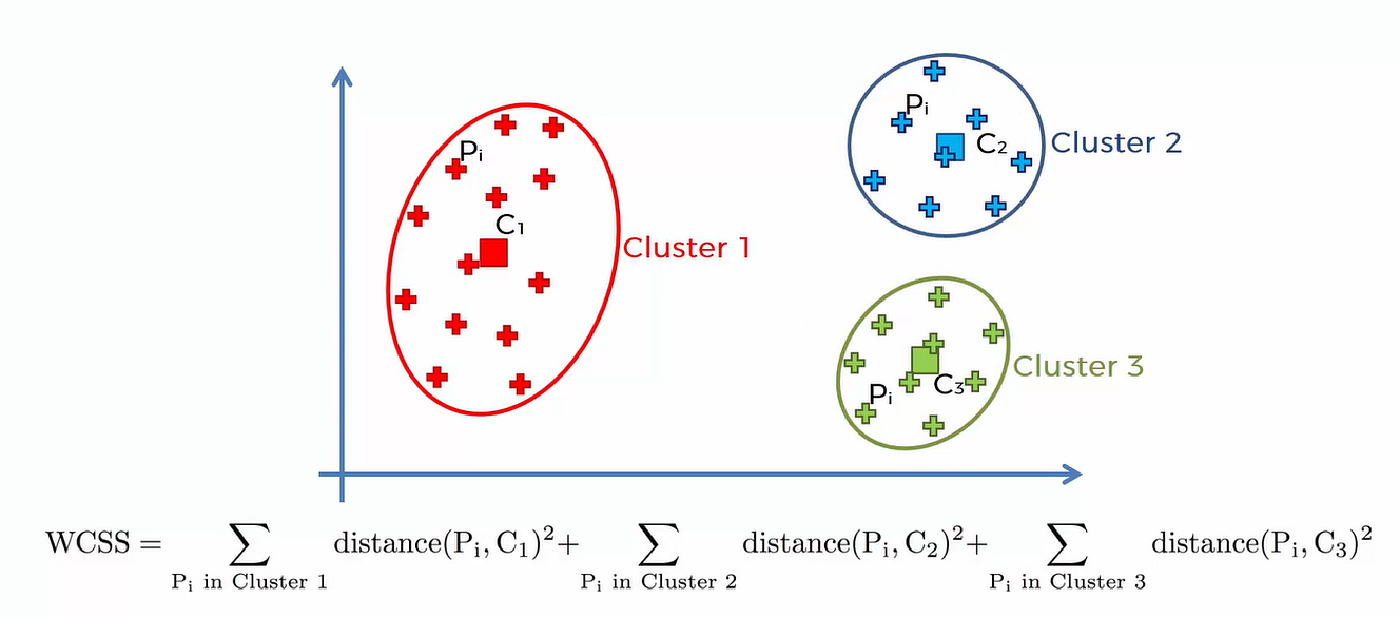

In [27]:
# Using elbow method to find the WCSS value for diff clusters (10 clusters used here)
wcss = []

for i in range(1,11):
  k_means = KMeans(n_clusters=i, init='k-means++', random_state=42)
  k_means.fit(X)

  wcss.append(k_means.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

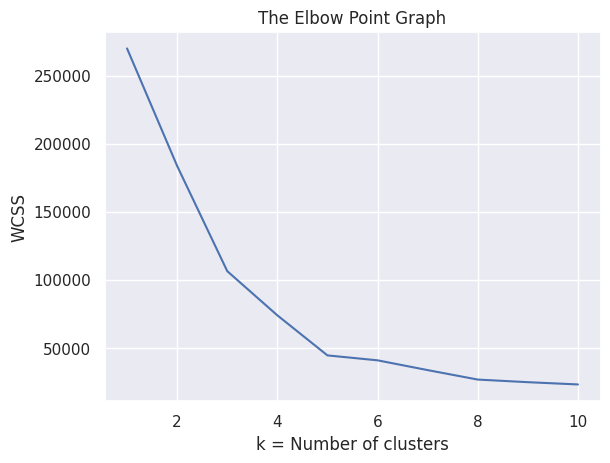

In [28]:
# Plotting the elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('k = Number of clusters')
plt.ylabel('WCSS')
plt.show

There is significant elbow at k=5, so it is the optimum number of clusters.

# Training k-Means clustering model
k-Means clustering is a model used in unsupervised learning (data with no labeling)

In [29]:
k_means = KMeans(n_clusters=5, init='k-means++', random_state=42)
# Target label for each data point based on their cluster
Y = k_means.fit_predict(X)
print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


# Visualizing trained k-Means clustering model

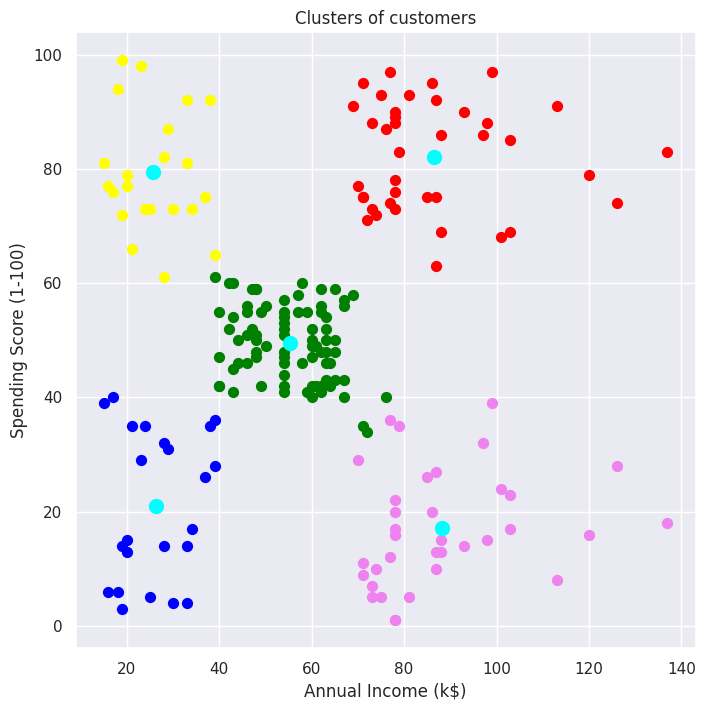

In [30]:
# Plotting all 5 clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(X.loc[Y==0, X.columns[0]], X.loc[Y==0, X.columns[1]], s=50, c='green', label='Cluster 1')
plt.scatter(X.loc[Y==1, X.columns[0]], X.loc[Y==1, X.columns[1]], s=50, c='red', label='Cluster 2')
plt.scatter(X.loc[Y==2, X.columns[0]], X.loc[Y==2, X.columns[1]], s=50, c='yellow', label='Cluster 3')
plt.scatter(X.loc[Y==3, X.columns[0]], X.loc[Y==3, X.columns[1]], s=50, c='violet', label='Cluster 4')
plt.scatter(X.loc[Y==4, X.columns[0]], X.loc[Y==4, X.columns[1]], s=50, c='blue', label='Cluster 5')

# Plotting centroids
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Conclusion
By analyzing the above graph of k-Means clustering model, we can tell that in order to boost sales we need to target customers who have less annual income (blue-colored) by launching membership plans or discount for first-timers and also target consumers who have more annual income (purple-colored) but spend less by offering incentives on increased purchases.